In [1]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from IPython.display import display, Math
sym.init_printing()
init_vprinting()

In [2]:
delt = sym.Symbol("\delta t")
T, alpha, m, gr, t, Lambda, T_max= sym.symbols("T alpha m, g t, lambda T_max")
t, alpha, T, m, gr, Lambda, T_max

In [3]:
x, y, z = dynamicsymbols("x y z")

x, y, z

<big>Continuous-Time Linear Quadratic Regulator</big>

dX/dt = AX + Bu

In [4]:
a, b, us = sym.symbols("A B u")
xs = dynamicsymbols("X")
sym.Eq(xs.diff(t), a*xs + b*us)

In [5]:
uroll, upitch, uthrottle = sym.symbols("u_roll u_pitch u_throttle")
uroll, upitch, uthrottle

In [6]:
X = sym.Matrix([[x],
                [x.diff(t)],
				[y],
				[y.diff(t)],
				[z],
				[z.diff(t)]])
X

⎡x⎤
⎢ ⎥
⎢ẋ⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎢ẏ⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣ż⎦

In [7]:
U = sym.Matrix([[uroll],
                [upitch],
                [uthrottle]])
U

⎡  uᵣₒₗₗ  ⎤
⎢         ⎥
⎢ u_pitch ⎥
⎢         ⎥
⎣uₜₕᵣₒₜₜₗₑ⎦

In [8]:
A = sym.Matrix([[0, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
				[0, 0, 0, 1, 0, 0],
				[0, 0, 0, 0, 0, 0],
				[0, 0, 0, 0, 0, 1],
				[0, 0, 0, 0, 0, 0]])
A

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  1  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  1⎥
⎢                ⎥
⎣0  0  0  0  0  0⎦

In [9]:
B = sym.Matrix([[0, 0, 0],
		        [alpha*m*gr/Lambda, 0, 0],
				[0, 0, 0],
				[0, -alpha*m*gr/Lambda, 0],
				[0, 0, 0],
				[0, 0, -(T_max-m*gr)/Lambda]])
B

⎡  0       0          0     ⎤
⎢                           ⎥
⎢α⋅g⋅m                      ⎥
⎢─────     0          0     ⎥
⎢  λ                        ⎥
⎢                           ⎥
⎢  0       0          0     ⎥
⎢                           ⎥
⎢       -α⋅g⋅m              ⎥
⎢  0    ───────       0     ⎥
⎢          λ                ⎥
⎢                           ⎥
⎢  0       0          0     ⎥
⎢                           ⎥
⎢                -Tₘₐₓ + g⋅m⎥
⎢  0       0     ───────────⎥
⎣                     λ     ⎦

In [10]:
sym.Eq(X.diff(t), sym.MatAdd(sym.MatMul(A, X), sym.MatMul(B, U)))

                               ⎡  0       0          0     ⎤            
                               ⎢                           ⎥            
                               ⎢α⋅g⋅m                      ⎥            
⎡ẋ⎤   ⎡0  1  0  0  0  0⎤ ⎡x⎤   ⎢─────     0          0     ⎥            
⎢ ⎥   ⎢                ⎥ ⎢ ⎥   ⎢  λ                        ⎥            
⎢ẍ⎥   ⎢0  0  0  0  0  0⎥ ⎢ẋ⎥   ⎢                           ⎥            
⎢ ⎥   ⎢                ⎥ ⎢ ⎥   ⎢  0       0          0     ⎥ ⎡  uᵣₒₗₗ  ⎤
⎢ẏ⎥   ⎢0  0  0  1  0  0⎥ ⎢y⎥   ⎢                           ⎥ ⎢         ⎥
⎢ ⎥ = ⎢                ⎥⋅⎢ ⎥ + ⎢       -α⋅g⋅m              ⎥⋅⎢ u_pitch ⎥
⎢ÿ⎥   ⎢0  0  0  0  0  0⎥ ⎢ẏ⎥   ⎢  0    ───────       0     ⎥ ⎢         ⎥
⎢ ⎥   ⎢                ⎥ ⎢ ⎥   ⎢          λ                ⎥ ⎣uₜₕᵣₒₜₜₗₑ⎦
⎢ż⎥   ⎢0  0  0  0  0  1⎥ ⎢z⎥   ⎢                           ⎥            
⎢ ⎥   ⎢                ⎥ ⎢ ⎥   ⎢  0       0          0     ⎥            
⎣z̈⎦   ⎣0  0  0  0  0  0⎦ ⎣ż⎦   ⎢          

In [13]:
sym.Eq(X.diff(t), A*X + B*U)

      ⎡           ẋ           ⎤
      ⎢                       ⎥
      ⎢      α⋅g⋅m⋅uᵣₒₗₗ      ⎥
⎡ẋ⎤   ⎢      ───────────      ⎥
⎢ ⎥   ⎢           λ           ⎥
⎢ẍ⎥   ⎢                       ⎥
⎢ ⎥   ⎢           ẏ           ⎥
⎢ẏ⎥   ⎢                       ⎥
⎢ ⎥ = ⎢    -α⋅g⋅m⋅u_pitch     ⎥
⎢ÿ⎥   ⎢    ───────────────    ⎥
⎢ ⎥   ⎢           λ           ⎥
⎢ż⎥   ⎢                       ⎥
⎢ ⎥   ⎢           ż           ⎥
⎣z̈⎦   ⎢                       ⎥
      ⎢uₜₕᵣₒₜₜₗₑ⋅(-Tₘₐₓ + g⋅m)⎥
      ⎢───────────────────────⎥
      ⎣           λ           ⎦

<big>Discrete-Time Linear Quadratic Regulator</big>

Xn+1 = AXn + Bu

In [14]:
Xn1, Xn, f, g, un = sym.symbols("X_n+1 X_n F G u_n")
Xn1, Xn, f, g, un

In [15]:
sym.Eq(Xn1, f*Xn + g*un)

In [16]:
sym.Eq(f, sym.exp(a*delt))

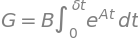

In [17]:
sym.Eq(g, (sym.Integral(sym.exp(a*t), (t, 0, delt)))*b)

In [18]:
A*delt

⎡0  \delta t  0     0      0     0    ⎤
⎢                                     ⎥
⎢0     0      0     0      0     0    ⎥
⎢                                     ⎥
⎢0     0      0  \delta t  0     0    ⎥
⎢                                     ⎥
⎢0     0      0     0      0     0    ⎥
⎢                                     ⎥
⎢0     0      0     0      0  \delta t⎥
⎢                                     ⎥
⎣0     0      0     0      0     0    ⎦

In [19]:
F = sym.exp(A*delt)
F

⎡1  \delta t  0     0      0     0    ⎤
⎢                                     ⎥
⎢0     1      0     0      0     0    ⎥
⎢                                     ⎥
⎢0     0      1  \delta t  0     0    ⎥
⎢                                     ⎥
⎢0     0      0     1      0     0    ⎥
⎢                                     ⎥
⎢0     0      0     0      1  \delta t⎥
⎢                                     ⎥
⎣0     0      0     0      0     1    ⎦

In [20]:
I=sym.Integral(sym.exp(A*t), (t, 0, delt))
I

\delta t                      
   ⌠                          
   ⎮     ⎡1  t  0  0  0  0⎤   
   ⎮     ⎢                ⎥   
   ⎮     ⎢0  1  0  0  0  0⎥   
   ⎮     ⎢                ⎥   
   ⎮     ⎢0  0  1  t  0  0⎥   
   ⎮     ⎢                ⎥ dt
   ⎮     ⎢0  0  0  1  0  0⎥   
   ⎮     ⎢                ⎥   
   ⎮     ⎢0  0  0  0  1  t⎥   
   ⎮     ⎢                ⎥   
   ⎮     ⎣0  0  0  0  0  1⎦   
   ⌡                          
   0                          

In [21]:
I.doit()

⎡                  2                                          ⎤
⎢          \delta t                                           ⎥
⎢\delta t  ─────────     0          0         0          0    ⎥
⎢              2                                              ⎥
⎢                                                             ⎥
⎢   0      \delta t      0          0         0          0    ⎥
⎢                                                             ⎥
⎢                                       2                     ⎥
⎢                               \delta t                      ⎥
⎢   0          0      \delta t  ─────────     0          0    ⎥
⎢                                   2                         ⎥
⎢                                                             ⎥
⎢   0          0         0      \delta t      0          0    ⎥
⎢                                                             ⎥
⎢                                                            2⎥
⎢                                       

In [22]:
G = I.doit()*B
G

⎡        2                                                  ⎤
⎢\delta t ⋅α⋅g⋅m                                            ⎥
⎢───────────────          0                     0           ⎥
⎢      2⋅λ                                                  ⎥
⎢                                                           ⎥
⎢\delta t⋅α⋅g⋅m                                             ⎥
⎢──────────────           0                     0           ⎥
⎢      λ                                                    ⎥
⎢                                                           ⎥
⎢                          2                                ⎥
⎢                 -\delta t ⋅α⋅g⋅m                          ⎥
⎢       0         ─────────────────             0           ⎥
⎢                        2⋅λ                                ⎥
⎢                                                           ⎥
⎢                 -\delta t⋅α⋅g⋅m                           ⎥
⎢       0         ────────────────              0           ⎥
⎢       